In [2]:
import qubecalib as qc
from qubecalib import Qube
import qubecalib.ui as ui
from qubecalib.ui import Qube
import e7awgsw

QUBE = Qube()
display(ui.LoadConfigPanel(QUBE))
# ハードウェアのコンフィグが終わっていれば，Load した時点で Qube オブジェクトから QuBE を操れる

LoadConfigPanel(children=(Text(value='qube_riken_1-01.yml', description='Config'), Button(description='Load', …

In [3]:
QUBE.config

{'bitfile': '0d60b1.bit',
 'ipfpga': '10.1.0.22',
 'iplsi': '10.5.0.22',
 'macfpga': '00-0A-35-0D-60-B1',
 'maclsi': '00-1B-1A-EE-01-21',
 'type': 'A'}

In [15]:
#QUBE.do_init('A', qc.PATH_TO_BITFILE+QUBE.config['bitfile'], message_out=True)

init LMX2594 for ctrl/readout
init LMX2594 for AD9082
init ADRF6780
init AD5328
init GPIOs for RF-switches
init FPGA

****** Vivado v2020.1 (64-bit)
  **** SW Build 2902540 on Wed May 27 19:54:35 MDT 2020
  **** IP Build 2902112 on Wed May 27 22:43:36 MDT 2020
    ** Copyright 1986-2020 Xilinx, Inc. All Rights Reserved.

source ./adi_api_mod/utils/config.tcl
# open_hw_manager
# connect_hw_server -allow_non_jtag
INFO: [Labtools 27-2285] Connecting to hw_server url TCP:localhost:3121
INFO: [Labtools 27-2222] Launching hw_server...
INFO: [Labtools 27-2221] Launch Output:

****** Xilinx hw_server v2020.1
  **** Build date : May 27 2020 at 20:33:44
    ** Copyright 1986-2020 Xilinx, Inc. All Rights Reserved.


INFO: [Labtools 27-3415] Connecting to cs_server url TCP:localhost:3042
INFO: [Labtools 27-3417] Launching cs_server...
INFO: [Labtools 27-2221] Launch Output:


****** Xilinx cs_server v2020.1.0
  **** Build date : May 14 2020-10:10:29
    ** Copyright 2017-2020 Xilinx, Inc. All Righ

In [ ]:
QUBE.do_init(message_out=True)

In [17]:
QUBE.restart_ad9082(message_out=False)

In [18]:
print(QUBE.qube.ad9082[0].get_jesd_status())
print(QUBE.qube.ad9082[1].get_jesd_status())

[['0x55E', '0xE0'], ['0x5BB', '0x01'], ['0x62E', '0x01'], ['pll_status', '0x01'], ['0x728', '0x0B']]
[['0x55E', '0xE0'], ['0x5BB', '0x01'], ['0x62E', '0x01'], ['pll_status', '0x01'], ['0x728', '0x0B']]


In [8]:
QUBE.bitfile, QUBE.rf_type # 実運用時には必要なくなるか...

('as is', 'as is')

In [45]:
# Restart LSIs
QUBE.do_init(message_out=False)

In [12]:
_ = [print(k, o.get_status()) for k, o in QUBE.qube.ports.items()]

0 RF = 13200.000 MHz LO = 10500    MHz IF = 2700.000 MHz LSB/USB: USB MODE AWG: Inactive
1 RF = 11500.000 MHz LO = 10500    MHz IF = 1000.000 MHz 
5 RF = 7800.000 MHz LO = 10500    MHz IF = 2700.000 MHz LSB/USB: LSB MODE AWG: Inactive
6 RF = 10000.000 MHz LO = 11000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive
7 RF = 10000.000 MHz LO = 11000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive
8 RF = 10000.000 MHz LO = 11000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive
12 RF = 10100.000 MHz LO =  9100    MHz IF = 1000.000 MHz 
13 RF = 10100.000 MHz LO =  9100    MHz IF = 1000.000 MHz LSB/USB: USB MODE AWG: Inactive


In [10]:
_ = [print(k, o) for k, o in QUBE.qube.ports.items()]

0 <qubecalib.ReadoutPort object at 0x7fac641bc5e0>
1 <qubecalib.ReadinPort object at 0x7facb478e400>
5 <qubecalib.CtrlPort object at 0x7fac641bc7c0>
6 <qubecalib.CtrlPort object at 0x7fac641bc910>
7 <qubecalib.CtrlPort object at 0x7fac641bca60>
8 <qubecalib.CtrlPort object at 0x7fac641bcbe0>
12 <qubecalib.ReadinPort object at 0x7fac641bcd90>
13 <qubecalib.ReadoutPort object at 0x7fac641bceb0>


In [12]:
# LongSend

In [5]:
p = QUBE.qube.ports[5]
p.set_lo(10500)
p.set_if(2700)
qc.LongSend.start(p)

In [7]:
p.get_status()

'RF = 7800.000 MHz LO = 10500    MHz IF = 2700.000 MHz LSB/USB: LSB MODE AWG: Active'

In [10]:
qc.LongSend.stop(QUBE.qube.ports[0])

In [22]:
[qc.LongSend.stop(v) if hasattr(v, 'dac') else None for k, v in QUBE.qube.ports.items()]

AwgTimeoutError: AWG idle timed out

P1 RF = 10100.000 MHz LO =  8300    MHz IF = 1800.000 MHz 
P0 RF = 10100.000 MHz LO =  8300    MHz IF = 1800.000 MHz LSB/USB: USB MODE AWG: Active


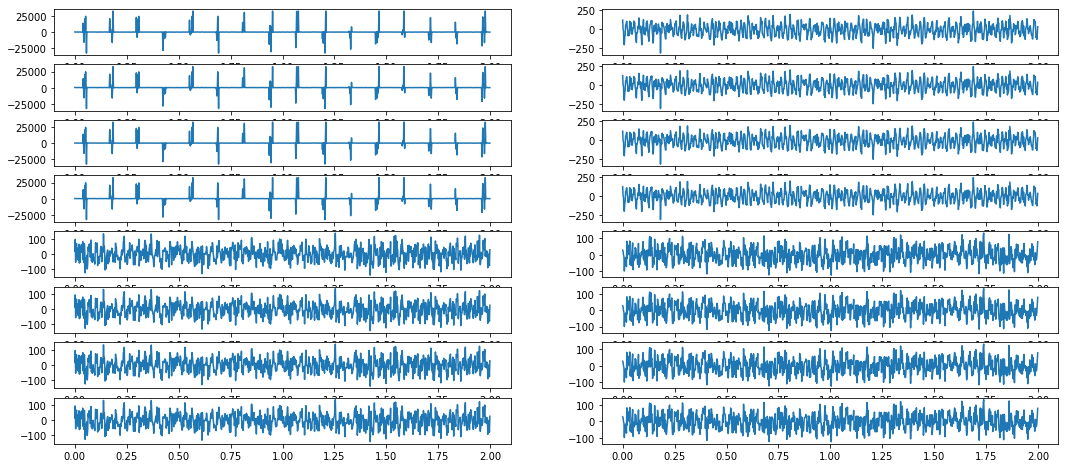

In [19]:
#p1 = QUBE.qube.ports[1]
#p1.set_lo(8300)
#p1.set_if(1800)
p12 = QUBE.qube.ports[12]
p12.set_lo(8300)
p12.set_if(1800)

#p0 = QUBE.qube.ports[0]
#p0.set_if(1800)
#qc.LongSend.stop(p0)
#qc.LongSend.start(p0)

p13 = QUBE.qube.ports[13]
p13.set_if(1800)
#qc.LongSend.stop(p13)
qc.LongSend.start(p13)

#qc.LongSend.stop(p)
#print('P0 '+p0.get_status())
print('P1 '+p1.get_status())

#qc.LongSend.start(p0)
#d1 = qc.Recv.start(p1)
d12 = qc.Recv.start(p12)

print('P0 '+p0.get_status())

%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

o = [np.array(v) for k, v in d1.items()] + [np.array(v) for k, v in d12.items()]

# Capture 1 が Port 1
# Capture 0 が Port 12

sampling_rate = e7awgsw.CaptureCtrl.SAMPLING_RATE
time = np.linspace(0, 1000000 * o[-1].shape[0] / sampling_rate, o[-1].shape[0], endpoint=False)

f, axs = plt.subplots(8,2, figsize=(18,8))
for i, v in enumerate(o):
    axs[i,0].plot(time[:1000], v[:,0][:1000])
    axs[i,1].plot(time[:1000], v[:,1][:1000])

In [16]:
e7awgsw.CaptureModule#.get_units(*e7awgsw.CaptureModule.all())
#e7awgsw.CaptureModule.get_units(e7awgsw.CaptureModule.all()[0])

<enum 'CaptureModule'>

In [18]:
e7awgsw.CaptureModule.U0

<CaptureModule.U0: 0>

In [6]:
import inspect
print(inspect.getsource(qc.qubelsi.ad9082))

import os
import subprocess

import qubelsi.udpsendrecv

class AD9082:

    def __init__(self, addr, path, chip):
        self.addr = addr
        self.chip = str(chip)
        self.path = path
        self.handle = qubelsi.udpsendrecv.UDPSendRecv(addr, path)

    def _setenv(self):
        os.environ['TARGET_ADDR'] = self.addr
        os.environ['AD9082_CHIP'] = self.chip
    
    def read_info(self):
        self._setenv()
        ret = subprocess.check_output("{}/src/print_ad9082_info".format(self.path), encoding='utf-8')
        return ret

    def set_nco(self, freq, ch, adc_mode=False, fine_mode=False):
        self._setenv()
        cmd = ["{}/src/set_nco".format(self.path),
               "--channel={}".format(ch),
               "--freq={}".format(freq),
        ]
        if adc_mode:
            cmd.append("--adc-mode")
        if fine_mode:
            cmd.append("--fine-mode")
        ret = subprocess.check_output(cmd, encoding='utf-8')
        return ret

    def set_xbar(

ADRF6780 の do_init の引数 usb_mode は False -> lsb, True -> usb を示す